In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

sys.path.append(os.path.expanduser('~/git/Python/user_modules/'))
from match_coord import match_coord

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
cat1 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/useful/gaia_dr2_g_18.fits'))
cat2 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/useful/gaia_edr3_g_18.fits'))

In [4]:
mask = cat1['PHOT_G_MEAN_MAG']<16
cat1 = cat1[mask]
print(len(cat1))

16125433


In [5]:
mask = cat2['PHOT_G_MEAN_MAG']<16
cat2 = cat2[mask]
print(len(cat2))

16234382


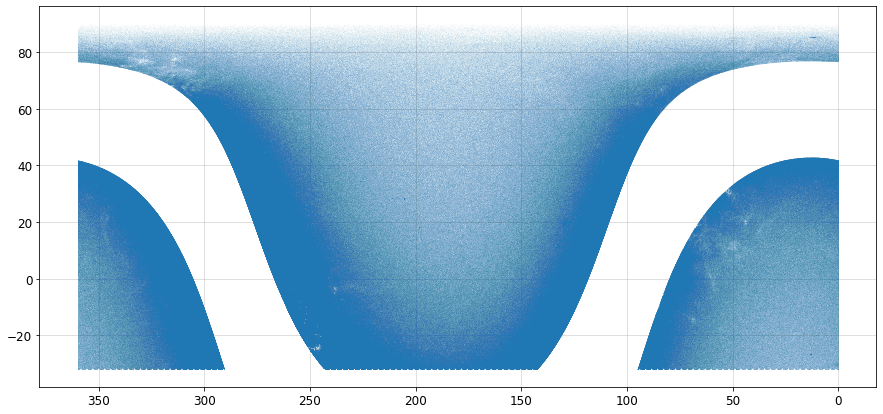

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(cat1['RA'], cat1['DEC'], '.', ms=0.1, alpha=0.1)
plt.grid(alpha=0.5)
plt.gca().invert_xaxis()
plt.show()

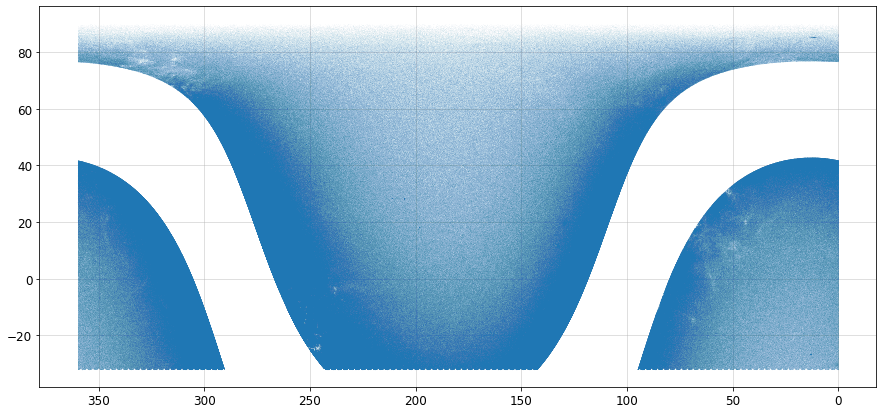

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(cat2['RA'], cat2['DEC'], '.', ms=0.1, alpha=0.1)
plt.grid(alpha=0.5)
plt.gca().invert_xaxis()
plt.show()

In [8]:
ramin, ramax, decmin, decmax = 150, 195, 0, 30

mask = (cat1['RA']>ramin) & (cat1['RA']<ramax) & (cat1['DEC']>decmin) & (cat1['DEC']<decmax)
cat1 = cat1[mask]
print(len(cat1))

mask = (cat2['RA']>ramin) & (cat2['RA']<ramax) & (cat2['DEC']>decmin) & (cat2['DEC']<decmax)
cat2 = cat2[mask]
print(len(cat2))

382634
385149


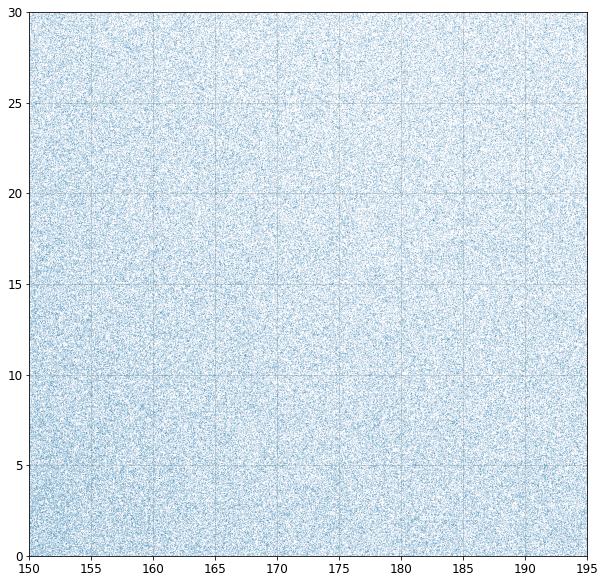

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(cat1['RA'], cat1['DEC'], '.', ms=0.2, alpha=0.5)
plt.grid(alpha=0.5)
plt.axis([ramin, ramax, decmin, decmax])
plt.show()

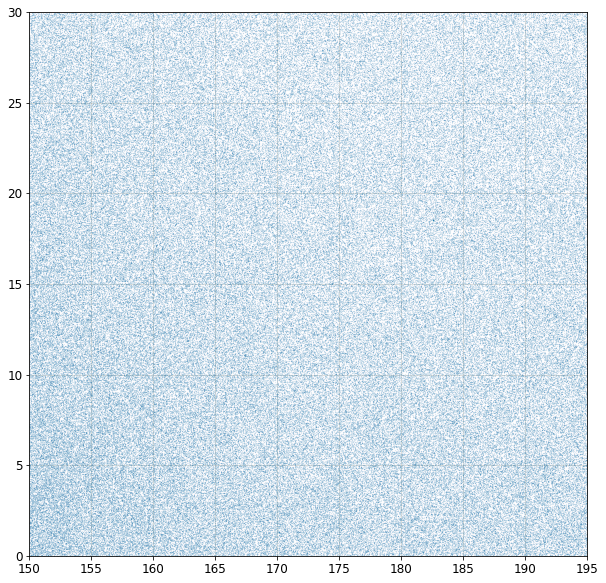

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(cat2['RA'], cat2['DEC'], '.', ms=0.2, alpha=0.5)
plt.grid(alpha=0.5)
plt.gca().invert_xaxis()
plt.axis([ramin, ramax, decmin, decmax])
plt.show()

Doubly matched objects = 14
Final matched objects = 381523


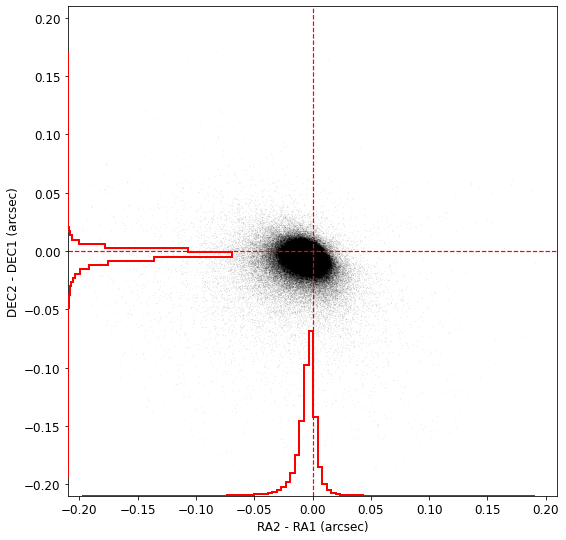

In [15]:
idx1, idx2, d2d, d_ra, d_dec = match_coord(cat1['RA'], cat1['DEC'], cat2['RA'], cat2['DEC'], search_radius=0.2, plot_q=True)

In [16]:
cat1 = cat1[idx1]
cat2 = cat2[idx2]

In [17]:
nmad = lambda x: 1.4826*np.median(np.abs(x-np.median(x)))

median: 0.012378693
std: 0.035504125
NMAD: 0.002533740234375


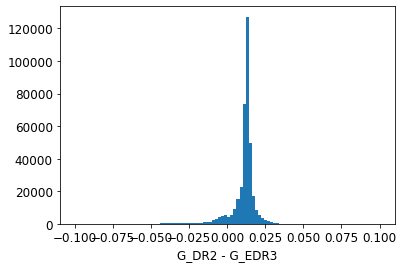

In [24]:
print('median:', np.median(cat1['PHOT_G_MEAN_MAG']-cat2['PHOT_G_MEAN_MAG']))
print('std:', np.std(cat1['PHOT_G_MEAN_MAG']-cat2['PHOT_G_MEAN_MAG']))
print('NMAD:', nmad(cat1['PHOT_G_MEAN_MAG']-cat2['PHOT_G_MEAN_MAG']))
plt.hist(cat1['PHOT_G_MEAN_MAG']-cat2['PHOT_G_MEAN_MAG'], 100, range=(-0.1, 0.1))
plt.xlabel('G_DR2 - G_EDR3')
plt.show()

median: 0.022117615
std: 2.0327482
NMAD: 0.006635515022277831


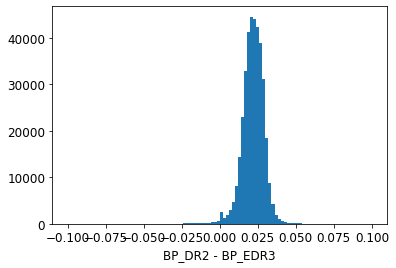

In [25]:
print('median:', np.median(cat1['PHOT_BP_MEAN_MAG']-cat2['PHOT_BP_MEAN_MAG']))
print('std:', np.std(cat1['PHOT_BP_MEAN_MAG']-cat2['PHOT_BP_MEAN_MAG']))
print('NMAD:', nmad(cat1['PHOT_BP_MEAN_MAG']-cat2['PHOT_BP_MEAN_MAG']))
plt.hist(cat1['PHOT_BP_MEAN_MAG']-cat2['PHOT_BP_MEAN_MAG'], 100, range=(-0.1, 0.1))
plt.xlabel('BP_DR2 - BP_EDR3')
plt.show()

median: 0.010710716
std: 1.8815064
NMAD: 0.0025266706466674804


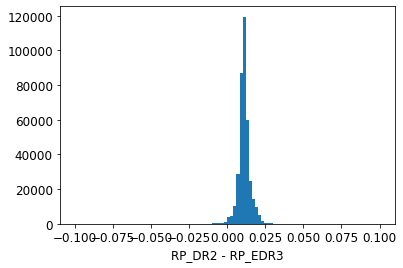

In [26]:
print('median:', np.median(cat1['PHOT_RP_MEAN_MAG']-cat2['PHOT_RP_MEAN_MAG']))
print('std:', np.std(cat1['PHOT_RP_MEAN_MAG']-cat2['PHOT_RP_MEAN_MAG']))
print('NMAD:', nmad(cat1['PHOT_RP_MEAN_MAG']-cat2['PHOT_RP_MEAN_MAG']))
plt.hist(cat1['PHOT_RP_MEAN_MAG']-cat2['PHOT_RP_MEAN_MAG'], 100, range=(-0.1, 0.1))
plt.xlabel('RP_DR2 - RP_EDR3')
plt.show()